In [2]:
from fastai.tabular import *

In [3]:
path = Path('project_data/heart_disease')
mydata = pd.read_csv(path/'hdisease.csv')

In [4]:
dep_var = 'DEATH_EVENT'
cat_names = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
cont_names = ['creatinine_phosphokinase', 'age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']
procs = [FillMissing, Categorify, Normalize]

In [5]:
mydata.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data = (TabularList.from_df(mydata, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(238,296)))
                           .label_from_df(cols=dep_var)
                           #.add_test(test)
                           .databunch())

In [7]:
data.show_batch(rows=10)

anaemia,diabetes,high_blood_pressure,sex,smoking,creatinine_phosphokinase,age,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,target
1,0,1,1,1,0.1367,-0.1448,1.7206,-0.5412,0.0513,-0.3245,-0.1543,0
0,0,0,1,1,-0.3824,-0.9691,0.5338,1.3325,0.1407,-0.1048,2.8290,0
1,0,0,0,0,-0.5139,0.6795,1.7206,-0.0854,-0.3063,-0.1048,-0.3113,0
1,1,0,0,1,-0.3210,-0.1448,-0.0200,-0.0854,0.6771,-0.9834,-0.9393,1
1,0,0,1,0,-0.4227,-0.1448,-1.0486,-0.5412,0.2301,-0.3245,-0.3584,1
1,1,0,1,1,-0.3489,0.9268,-0.6530,-1.0476,-0.2347,1.2131,1.1803,0
0,0,1,1,1,-0.5139,-0.1448,-1.0486,-0.5209,1.8393,-0.1048,1.2902,0
1,1,1,0,0,-0.0120,-0.9691,-1.4442,0.1576,-0.3957,-0.5441,1.2745,0
0,0,1,1,0,0.7538,-0.8867,-1.0486,0.0766,-0.4851,-1.4228,-1.0493,1
0,0,0,1,1,-0.5130,-0.5570,-0.2574,-0.3589,-0.2169,-0.3245,-0.2328,0


In [6]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


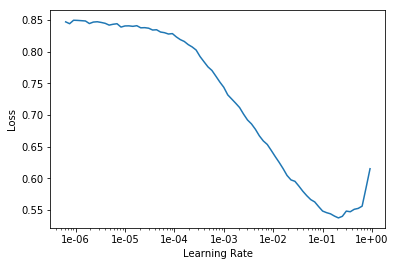

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4, 4e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.785884,0.689288,0.551724,00:00
1,0.682080,0.648833,0.931035,00:00
2,0.624896,0.596231,0.948276,00:00
3,0.575383,0.534153,0.948276,00:00


In [18]:
learn.fit(4, 4e-4, wd = 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.215385,0.172140,0.948276,00:00
1,0.215922,0.178797,0.948276,00:00
2,0.203035,0.180383,0.931035,00:00
3,0.201539,0.182676,0.931035,00:00
